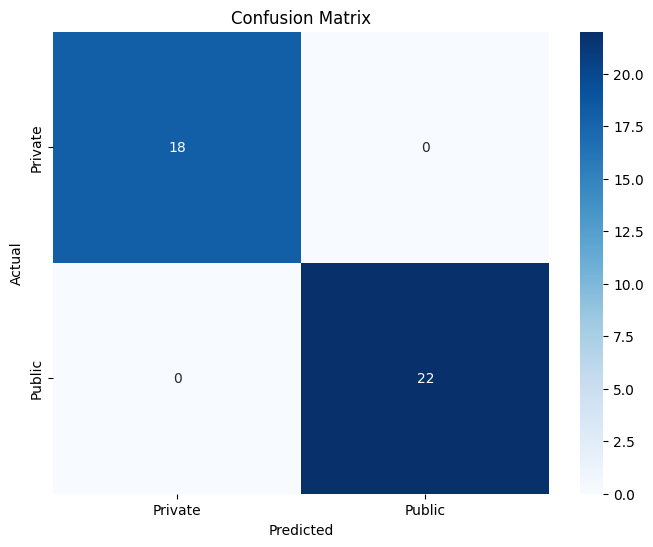

Accuracy: 1.0
Confusion Matrix:
 [[18  0]
 [ 0 22]]


In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new CSV file
file_path = 'bigNewWalletData.csv'
df = pd.read_csv(file_path)

# Randomize the order of the rows in the dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Prepare the text data and labels
X = df['Embedding'].apply(eval).tolist()  # Assuming the embeddings are stored as strings
y = df['Label']  # Use the Label column for the target

# Convert embeddings to a numpy array
X_embeddings = np.array(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the dimensionality of the embeddings to 10 components
small_pca = PCA(n_components=10)
X_train_pca = small_pca.fit_transform(X_train)
X_test_pca = small_pca.transform(X_test)

# Train the logistic regression model
small_model = LogisticRegression(max_iter=1000)
small_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = small_model.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Private", "Public"], yticklabels=["Private", "Public"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Replace the 'Embedding' column with the compressed embeddings and add the predictions
df_test = df.loc[y_test.index].copy()
df_test['Embedding'] = [list(X_test_pca[i]) for i in range(len(y_test))]
df_test['Predicted Label'] = y_pred

# # Save the test results to a CSV
# results_csv_path = 'nw_test_results.csv'
# df_test.to_csv(results_csvb_path, index=False)


In [13]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(small_model, 'small_logistic_regression_model.pkl')

# Save the trained PCA model
joblib.dump(small_pca, 'small_pca_model.pkl')

['small_pca_model.pkl']

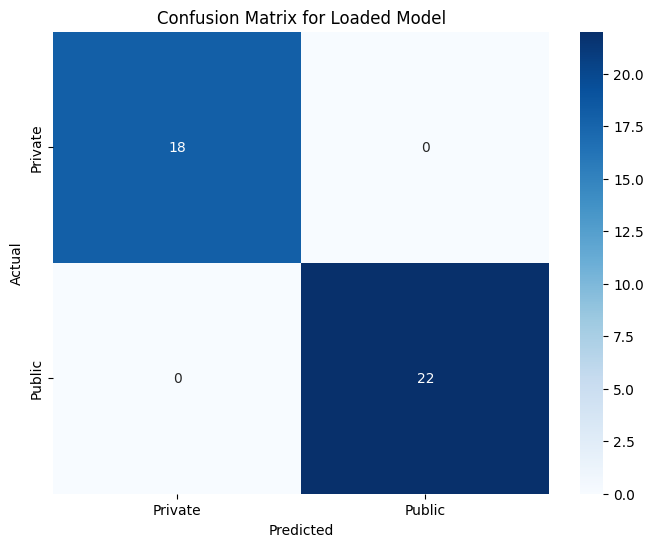

Accuracy of loaded model: 1.0
Confusion Matrix for Loaded Model:
 [[18  0]
 [ 0 22]]


In [14]:
# Load the Logistic Regression model
small_loaded_model = joblib.load('small_logistic_regression_model.pkl')

# Load the PCA model
small_loaded_pca = joblib.load('small_pca_model.pkl')

# Transform the test data using the loaded PCA model
X_test_pca_loaded = small_loaded_pca.transform(X_test)  # Use X_test before PCA transformation

# Make predictions on the test set using the loaded Logistic Regression model
y_pred_loaded = small_loaded_model.predict(X_test_pca_loaded)

# Calculate accuracy for the loaded model
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)

# Generate confusion matrix for the loaded model
conf_matrix_loaded = confusion_matrix(y_test, y_pred_loaded)

# Display the confusion matrix for the loaded model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_loaded, annot=True, fmt="d", cmap="Blues", xticklabels=["Private", "Public"], yticklabels=["Private", "Public"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Loaded Model")
plt.show()

print("Accuracy of loaded model:", accuracy_loaded)
print("Confusion Matrix for Loaded Model:\n", conf_matrix_loaded)

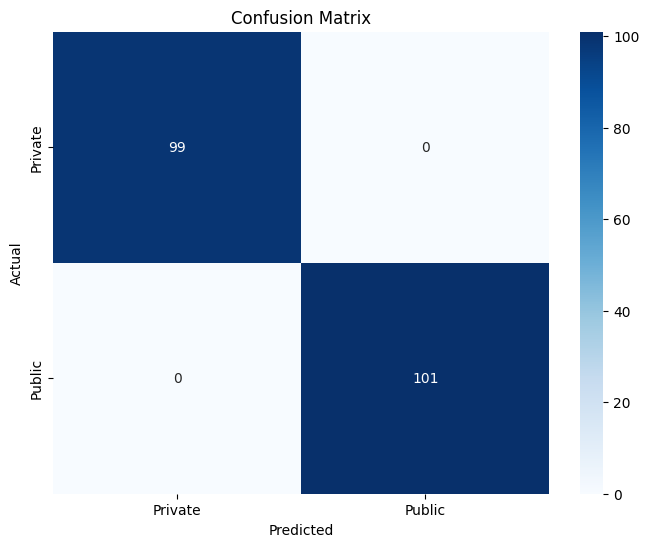

Accuracy: 1.0
Confusion Matrix:
 [[ 99   0]
 [  0 101]]


In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openai
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')

# Initialize OpenAI client with API key
client = openai.OpenAI(api_key=api_key)

# Function to embed a batch of texts using OpenAI's embedding model
def embed_text_batch(texts):
    response = client.embeddings.create(
        input=texts,  # The texts to be embedded
        model="text-embedding-3-small"  # The model used for embedding
    )
    return [item.embedding for item in response.data]  # Return the embeddings

# Load the new CSV file
file_path = 'ADDRESSmegalist.csv'
df = pd.read_csv(file_path)

# Randomize the order of the rows in the dataframe and select 1000 random rows
df = df.sample(n=1000, random_state=42).reset_index(drop=True)

# Prepare the text data and labels
X = df['ADDRESS'].tolist()
y = df['Label']

# Embed the text data
embeddings = embed_text_batch(X)

# Convert embeddings to a numpy array
X_embeddings = np.array(embeddings)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the dimensionality of the embeddings to 10 components
big_pca = PCA(n_components=10)
X_train_pca = big_pca.fit_transform(X_train)
X_test_pca = big_pca.transform(X_test)

# Train the logistic regression model
big_model = LogisticRegression(max_iter=1000)
big_model.fit(X_train_pca, y_train)

# Save the trained Logistic Regression model
joblib.dump(big_model, 'big_logistic_regression_model.pkl')

# Save the trained PCA model
joblib.dump(big_pca, 'big_pca_model.pkl')

# Make predictions on the test set
y_pred = big_model.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Private", "Public"], yticklabels=["Private", "Public"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Create a DataFrame for the test set with original columns
df_test = df.loc[y_test.index].copy()
df_test['ADDRESS'] = [list(X_test_pca[i]) for i in range(len(y_test))]
df_test['Predicted Label'] = y_pred

# # Save the test results to a CSV
# results_csv_path = 'mega_test_results.csv'
# df_test.to_csv(results_csv_path, index=False)

# print(f"Test results saved to {results_csv_path}")


In [18]:
# Load the Logistic Regression model
big_loaded_model = joblib.load('big_logistic_regression_model.pkl')

# Load the PCA model
big_loaded_pca = joblib.load('big_pca_model.pkl')

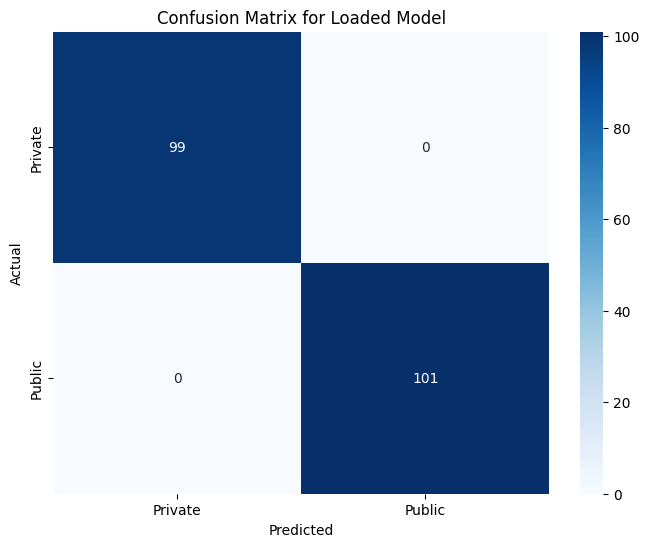

Accuracy of loaded model: 1.0
Confusion Matrix for Loaded Model:
 [[ 99   0]
 [  0 101]]


In [19]:
# Transform the test data using the loaded PCA model
X_test_pca_loaded = big_loaded_pca.transform(X_test)  # Use X_test before PCA transformation

# Make predictions on the test set using the loaded Logistic Regression model
y_pred_loaded = big_loaded_model.predict(X_test_pca_loaded)

# Calculate accuracy for the loaded model
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)

# Generate confusion matrix for the loaded model
conf_matrix_loaded = confusion_matrix(y_test, y_pred_loaded)

# Display the confusion matrix for the loaded model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_loaded, annot=True, fmt="d", cmap="Blues", xticklabels=["Private", "Public"], yticklabels=["Private", "Public"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Loaded Model")
plt.show()

print("Accuracy of loaded model:", accuracy_loaded)
print("Confusion Matrix for Loaded Model:\n", conf_matrix_loaded)